# 19EAC381
# An Approach for Prediction of Loan Approval using Machine Learning Algorithm

## Implementation

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics

warnings.filterwarnings('ignore')
data = pd.read_csv("LoanApprovalPrediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [3]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
obj

Loan_ID               True
Gender                True
Married               True
Dependents           False
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area         True
Loan_Status           True
dtype: bool

In [5]:
# Dropping Loan_ID column 
data.drop(['Loan_ID'],axis=1,inplace=True)

## Visualizing Data

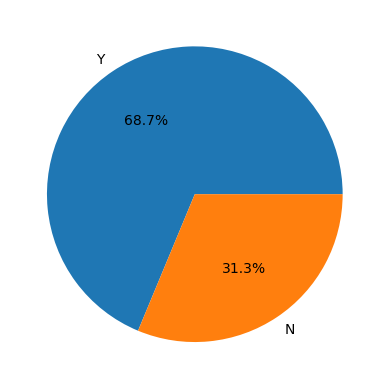

In [6]:
temp = data['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

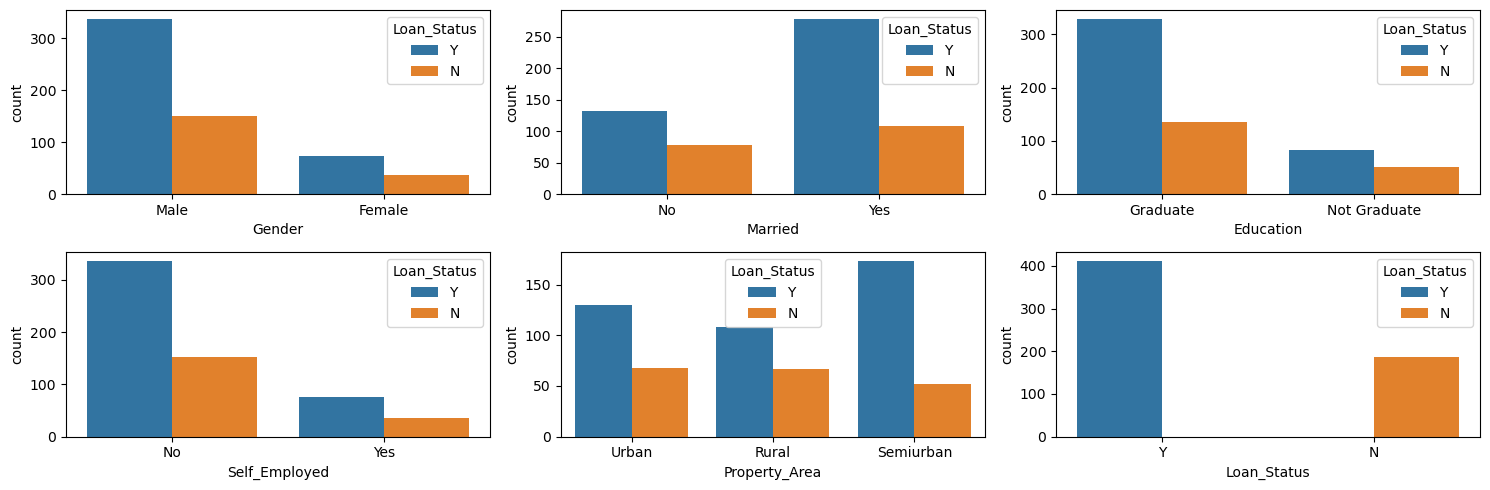

In [7]:

plt.subplots(figsize=(15, 5))
for i, col in enumerate(['Gender', 'Married','Education','Self_Employed','Property_Area', 'Loan_Status']):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=data, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()

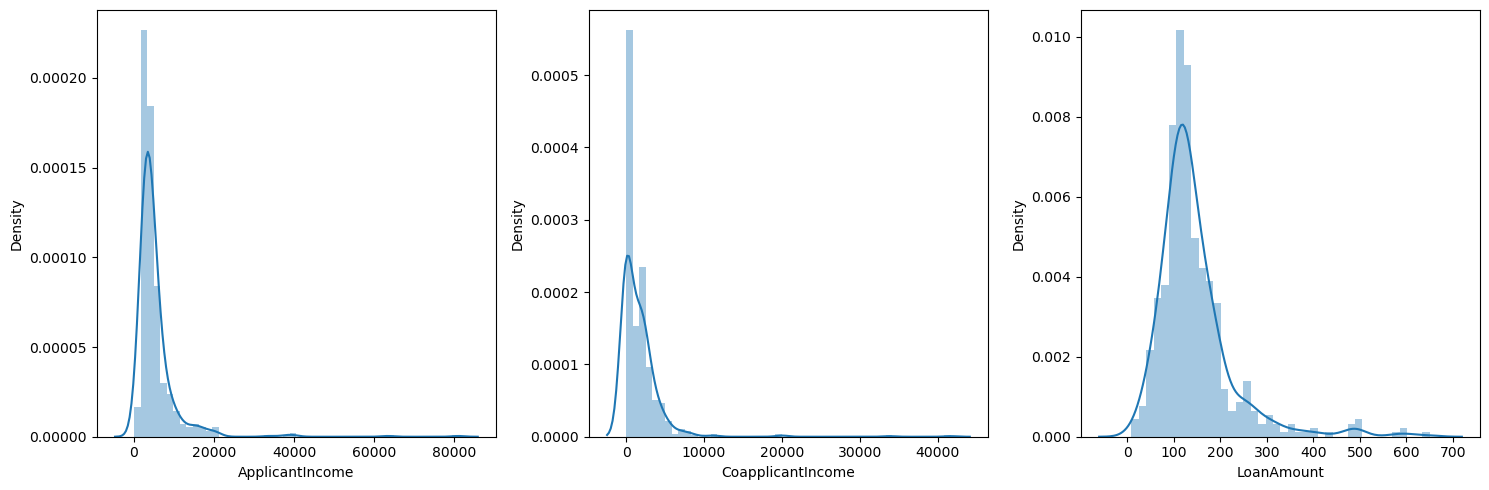

In [8]:

plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']):
    plt.subplot(1, 3, i+1)
    sns.distplot(data[col])
plt.tight_layout()
plt.show()

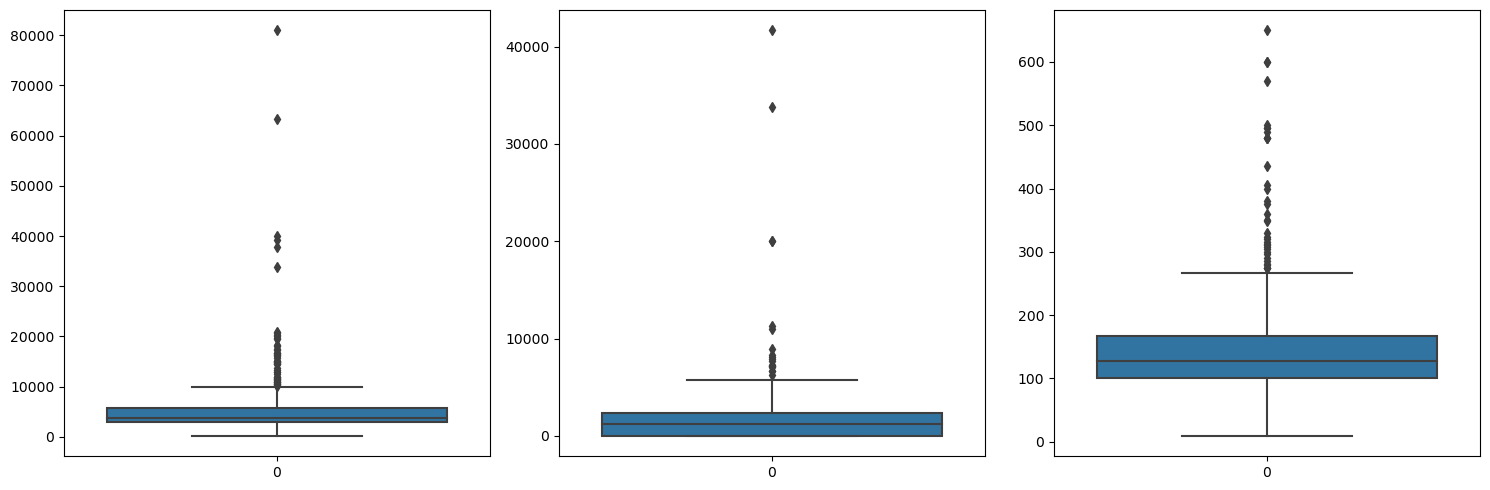

In [9]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data[col])
plt.tight_layout()
plt.show()

In [10]:
#removing outliners

data = data[data['ApplicantIncome'] < 25000]
data = data[data['LoanAmount'] < 400000]

In [11]:
# Import label encoder 
from sklearn import preprocessing 
    
# label_encoder object knows how  
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
  data[col] = label_encoder.fit_transform(data[col])

<Axes: >

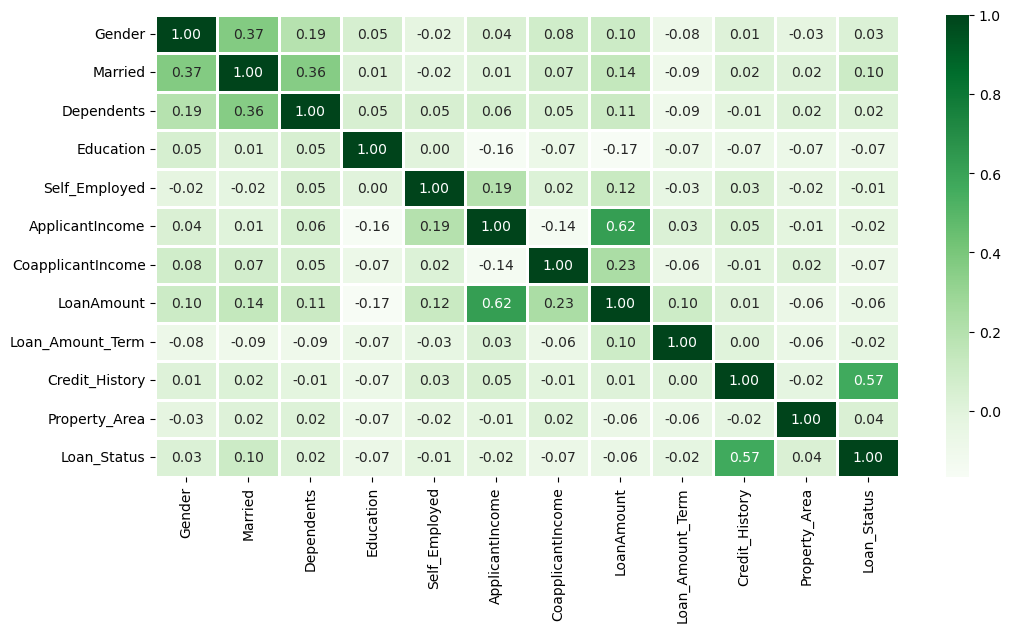

In [12]:
plt.figure(figsize=(12,6)) 
  
sns.heatmap(data.corr(),cmap='Greens',fmt='.2f', 
            linewidths=2,annot=True)

In [13]:
data.isna().sum()

Gender                0
Married               0
Dependents           11
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
#filling the null values with mean value

for col in data.columns: 
  data[col] = data[col].fillna(data[col].mean())  
    
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Splitting Dataset

In [15]:

from sklearn.model_selection import train_test_split 
  
X = data.drop(['Loan_Status'],axis=1) 
Y = data['Loan_Status'] 
X.shape,Y.shape 
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

## Model training and evaluation

In [28]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
  
from sklearn import metrics 
  
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, 
                             criterion = 'entropy', 
                             random_state =7) 
svc = SVC() 
lc = LogisticRegression()
print("\n",Y_test,"\n")

  
# making predictions on the training set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_train) 
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(Y_train,Y_pred))


 271    1
141    1
504    0
184    1
69     1
      ..
444    1
353    1
100    1
516    1
131    1
Name: Loan_Status, Length: 229, dtype: int32 

Accuracy score of  RandomForestClassifier = 96.19883040935673
Accuracy score of  KNeighborsClassifier = 75.14619883040936
Accuracy score of  SVC = 67.2514619883041
Accuracy score of  LogisticRegression = 78.3625730994152


In [29]:
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_train)
    print("predicted values of ", clf.__class__.__name__, "\n",Y_pred,"\n")
    print("classification matrix of ", clf.__class__.__name__, "\n",metrics.classification_report(Y_train,Y_pred))


predicted values of  RandomForestClassifier 
 [1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0
 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 0 0 0] 

classification matrix of  RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       115
           1       0.95      0.99      0.97       227

    accuracy                           0.9

## Without using Gender and Married columns

In [18]:
data1=data.drop(['Gender','Married'],axis=1)
data1.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,2.0,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [19]:
from sklearn.model_selection import train_test_split 
  
X = data1.drop(['Loan_Status'],axis=1) 
Y = data1['Loan_Status'] 
X.shape,Y.shape 
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

In [20]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
  
from sklearn import metrics 
  
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, 
                             criterion = 'entropy', 
                             random_state =7) 
svc = SVC() 
lc = LogisticRegression() 
  
# making predictions on the training set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_train) 
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(Y_train,Y_pred))

Accuracy score of  RandomForestClassifier = 96.19883040935673
Accuracy score of  KNeighborsClassifier = 75.14619883040936
Accuracy score of  SVC = 67.2514619883041
Accuracy score of  LogisticRegression = 78.3625730994152


In [21]:
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_train) 
    print("predicted values of ", clf.__class__.__name__, "\n",Y_pred,"\n")
    print("Classification matrix of ", clf.__class__.__name__, "\n",metrics.classification_report(Y_train,Y_pred))


predicted values of  RandomForestClassifier 
 [1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0
 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 0 0 0] 

Classification matrix of  RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       115
           1       0.95      0.99      0.97       227

    accuracy                           0.9